In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
california = fetch_california_housing()
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build the ANN with 2 hidden layers

In [5]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),  # 2nd hidden layer
    Dense(1)  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, verbose=0)

loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

Test MSE: 0.2940
Test MAE: 0.3675


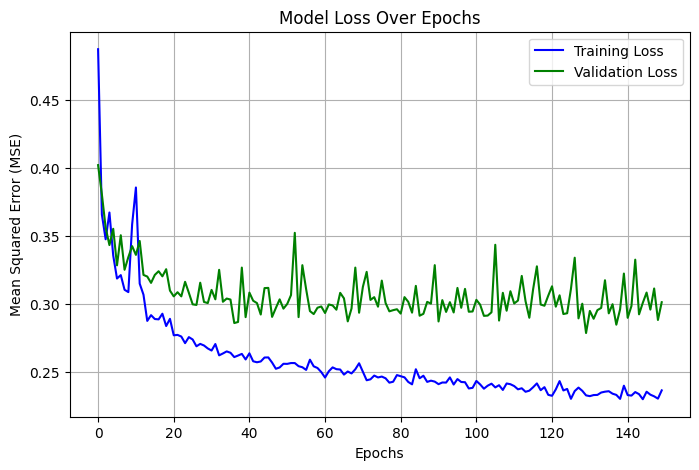

In [7]:
# Plot training vs validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()


Using Mnist Data Set

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
fashiondata = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)= fashiondata.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train, x_test = x_train/255, x_test/255

In [15]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8566 - loss: 0.4883
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9561 - loss: 0.1484
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9677 - loss: 0.1061
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9736 - loss: 0.0864
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9772 - loss: 0.0729


In [20]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9742 - loss: 0.0856


[0.07308907061815262, 0.9782000184059143]